In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [52]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.max_info_columns', 10000)   # zeigt alle Spaltennamen in info()
pd.set_option('display.max_info_rows', 200000)     # zeigt Zeileninfo, wenn nötig


# Pfad zur Datei (liegt im gleichen Ordner wie das Notebook)
path = Path("dataset/311_Service_Requests_2024.csv")

# Einfacher Import
df = pd.read_csv(path)

In [53]:
# Anzahl Einträge von Jahr 2024 und 2025
df['CREATED_DATE'] = pd.to_datetime(df['CREATED_DATE'], errors='coerce')

year_counts = df['CREATED_DATE'].dt.year.value_counts().sort_index()

print(year_counts.loc[2024], "Einträge im Jahr 2024")

1913929 Einträge im Jahr 2024


In [54]:
print(list(df.columns))
print(len(df.columns))

['SR_NUMBER', 'SR_TYPE', 'SR_SHORT_CODE', 'CREATED_DEPARTMENT', 'OWNER_DEPARTMENT', 'STATUS', 'ORIGIN', 'CREATED_DATE', 'LAST_MODIFIED_DATE', 'CLOSED_DATE', 'STREET_ADDRESS', 'CITY', 'STATE', 'ZIP_CODE', 'STREET_NUMBER', 'STREET_DIRECTION', 'STREET_NAME', 'STREET_TYPE', 'DUPLICATE', 'LEGACY_RECORD', 'LEGACY_SR_NUMBER', 'PARENT_SR_NUMBER', 'COMMUNITY_AREA', 'WARD', 'ELECTRICAL_DISTRICT', 'ELECTRICITY_GRID', 'POLICE_SECTOR', 'POLICE_DISTRICT', 'POLICE_BEAT', 'PRECINCT', 'SANITATION_DIVISION_DAYS', 'CREATED_HOUR', 'CREATED_DAY_OF_WEEK', 'CREATED_MONTH', 'X_COORDINATE', 'Y_COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION']
39


# Spalten: 

* __SR_NUMBER__ : Service Request Number, starts with SR24 (for year 2024) then 8 digits, Example SR25-01854880
* __SR_TYPE__ : states the type of the Service Request, Example 311 INFORMATION ONLY CALL
* __SR_SHORT_CODE__ : every type has a short code for example 311IOC 
* __CREATED_DEPARTMENT__ : The department, if any, that created the service request. Example CDOT - Department of Transportation
* __OWNER_DEPARTMENT__ : The department with initial responsibility for the service request. Example 311 City Services
* __STATUS__ : states if it is open or completed, Example Open
* __ORIGIN__ : where the request was created, Example Phone Call
* __CREATED_DATE__
* __LAST_MODIFIED_DATE__
* __CLOSED_DATE__
* __STREET_ADDRESS__
* __CITY__
* __STATE__
* __ZIP_CODE__
* __STREET_NUMBER__
* __STREET_DIRECTION__ : the direction of the street in N, W, E, S Example N
* __STREET_NAME__
* __STREET_TYPE__
* __DUPLICATE__
* __LEGACY_RECORD__ : Did this request originate in the previous 311 system?
* __LEGACY_SR_NUMBER__ : is NaN
* __PARENT_SR_NUMBER__ : is NaN
* __COMMUNITY_AREA__
* __WARD__
* __ELECTRICAL_DISTRICT__
* __ELECTRICITY_GRID__
* __POLICE_SECTOR__
* __POLICE_DISTRICT__
* __POLICE_BEAT__
* __PRECINCT__
* __SANITATION_DIVISION_DAYS__ : has only Missing Values
* __CREATED_HOUR__ : 
* __CREATED_DAY_OF_WEEK__ : The day of the week component of CREATED_DATE. Sunday=1
* __CREATED_MONTH__
* __X_COORDINATE__ : The x coordinate of the location in State Plane Illinois East NAD 1983 projection.
* __Y_COORDINATE__ : The y coordinate of the location in State Plane Illinois East NAD 1983 projection.
* __LATITUDE__
* __LONGITUDE__
* __LOCATION__ : The location in a format that allows for creation of maps and other geographic operations on this data portal.


In [55]:

# schneller Blick
df.head()

,SR_NUMBER,SR_TYPE,SR_SHORT_CODE,CREATED_DEPARTMENT,OWNER_DEPARTMENT,STATUS,ORIGIN,CREATED_DATE,LAST_MODIFIED_DATE,CLOSED_DATE,STREET_ADDRESS,CITY,STATE,ZIP_CODE,STREET_NUMBER,STREET_DIRECTION,STREET_NAME,STREET_TYPE,DUPLICATE,LEGACY_RECORD,LEGACY_SR_NUMBER,PARENT_SR_NUMBER,COMMUNITY_AREA,WARD,ELECTRICAL_DISTRICT,ELECTRICITY_GRID,POLICE_SECTOR,POLICE_DISTRICT,POLICE_BEAT,PRECINCT,SANITATION_DIVISION_DAYS,CREATED_HOUR,CREATED_DAY_OF_WEEK,CREATED_MONTH,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,SR24-02338876,Stray Animal Complaint,EAE,311 City Services,Animal Care and Control,Canceled,Phone Call,2024-12-31 23:59:43,01/06/2025 11:41:31 AM,01/06/2025 11:41:31 AM,2138 W CERMAK RD,Chicago,Illinois,60608.000,2138,W,CERMAK,RD,False,False,NaN,NaN,31.000,25.000,NaN,K026,3.000,12.000,1234.000,30.000,NaN,23,3,12,1162278.629,1889470.438,41.852,-87.680,"(41.852376000940346, -87.6798810000019)"
1,SR24-02338875,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,2024-12-31 23:56:45,01/01/2025 12:31:44 AM,12/31/2024 11:56:45 PM,2111 W Lexington ST,Chicago,Illinois,60612.000,2111,W,Lexington,ST,False,False,NaN,NaN,28.000,28.000,NaN,K024,2.000,12.000,1225.000,46.000,NaN,23,3,12,1162234.467,1896560.962,41.872,-87.680,"(41.87183400094043, -87.6798450000019)"
2,SR24-02338874,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,2024-12-31 23:55:30,01/01/2025 12:31:24 AM,12/31/2024 11:55:30 PM,2111 W Lexington ST,Chicago,Illinois,60612.000,2111,W,Lexington,ST,False,False,NaN,NaN,28.000,28.000,NaN,K024,2.000,12.000,1225.000,46.000,NaN,23,3,12,1162234.467,1896560.962,41.872,-87.680,"(41.87183400094043, -87.6798450000019)"
3,SR24-02338873,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,2024-12-31 23:53:21,01/01/2025 12:31:44 AM,12/31/2024 11:53:21 PM,2111 W Lexington ST,Chicago,Illinois,60612.000,2111,W,Lexington,ST,False,False,NaN,NaN,28.000,28.000,NaN,K024,2.000,12.000,1225.000,46.000,NaN,23,3,12,1162234.467,1896560.962,41.872,-87.680,"(41.87183400094043, -87.6798450000019)"
4,SR24-02338872,311 INFORMATION ONLY CALL,311IOC,311 City Services,311 City Services,Completed,Phone Call,2024-12-31 23:51:22,01/01/2025 12:31:24 AM,12/31/2024 11:51:22 PM,2111 W Lexington ST,Chicago,Illinois,60612.000,2111,W,Lexington,ST,False,False,NaN,NaN,28.000,28.000,NaN,K024,2.000,12.000,1225.000,46.000,NaN,23,3,12,1162234.467,1896560.962,41.872,-87.680,"(41.87183400094043, -87.6798450000019)"


In [56]:
from IPython.display import display
display(df.nunique().to_frame('nunique')) #weil sonst die ausgabe gekürzt wird

,nunique
SR_NUMBER,1913929
SR_TYPE,107
SR_SHORT_CODE,107
CREATED_DEPARTMENT,14
OWNER_DEPARTMENT,14
STATUS,3
ORIGIN,32
CREATED_DATE,1772924
LAST_MODIFIED_DATE,747048
CLOSED_DATE,1657390


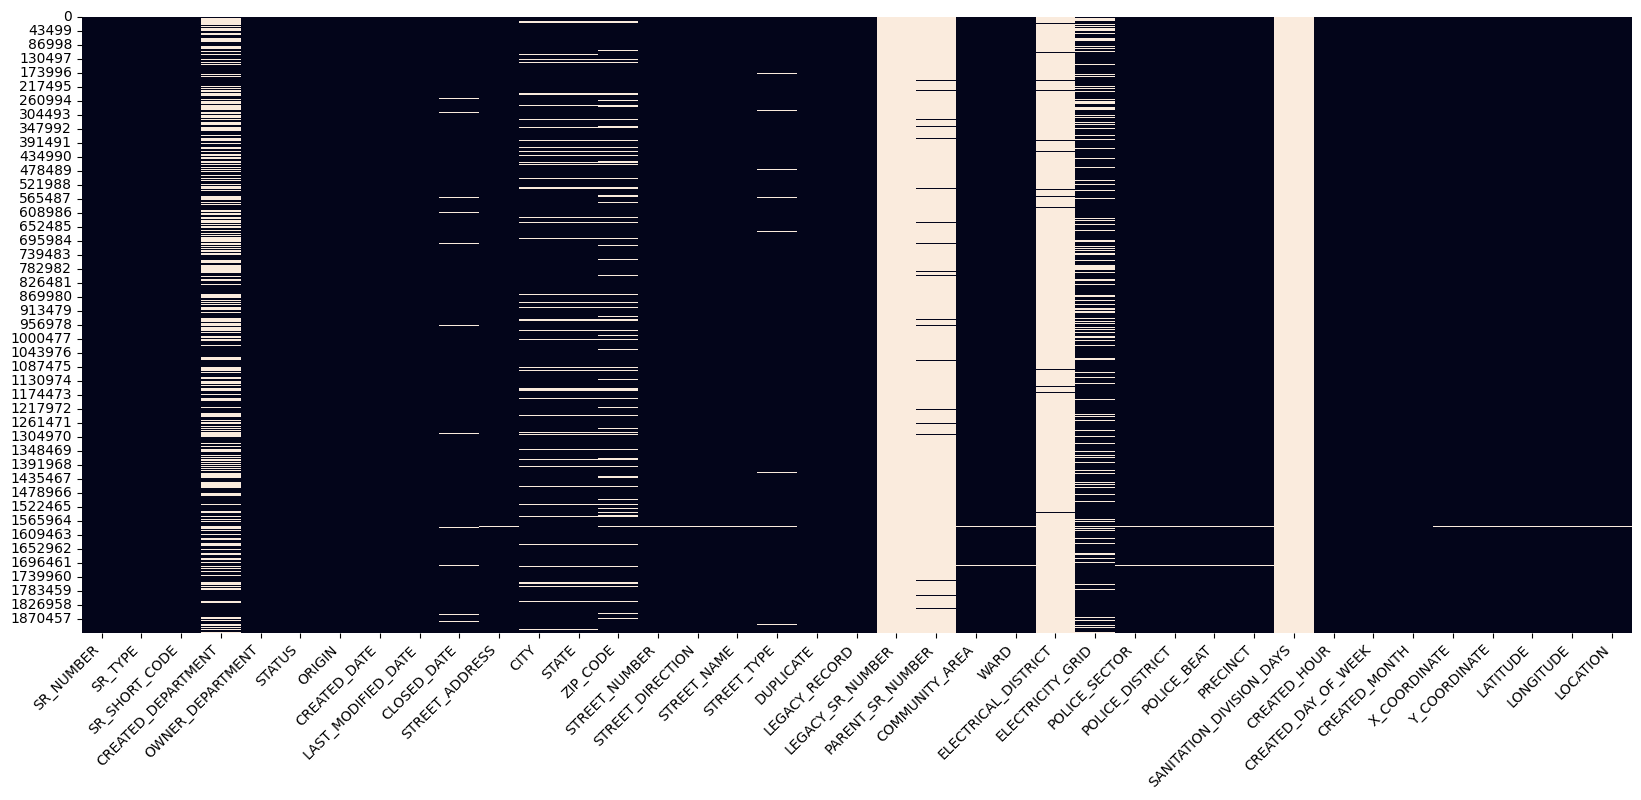

In [57]:
plt.figure(figsize=(20, 8))  # Breite und Höhe anpassen
sns.heatmap(df.isna(), cbar=False) #cbar False damit kein Balken auf der Seite angezeigt wird
plt.xticks(rotation=45, ha='right')  # Achsenbeschriftung lesbar machen
plt.show()

In [9]:
df.shape

(1913929, 39)

In [25]:
pd.set_option('display.float_format', '{:.3f}'.format) #damit auf 2 nachkommstellen gerunded wird
df.describe()

,CREATED_DATE,ZIP_CODE,LEGACY_SR_NUMBER,COMMUNITY_AREA,WARD,ELECTRICAL_DISTRICT,POLICE_SECTOR,POLICE_DISTRICT,POLICE_BEAT,PRECINCT,SANITATION_DIVISION_DAYS,CREATED_HOUR,CREATED_DAY_OF_WEEK,CREATED_MONTH,X_COORDINATE,Y_COORDINATE,LATITUDE,LONGITUDE
count,1913929,1702975.000,0.000,1912120.000,1912188.000,41550.000,1912252.000,1912252.000,1912252.000,1911746.000,0.000,1913929.000,1913929.000,1913929.000,1912914.000,1912914.000,1912867.000,1912867.000
mean,2024-06-24 20:32:20.736910080,60630.419,NaN,40.491,28.690,6.818,2.518,13.057,1334.570,30.740,NaN,12.970,3.929,6.280,1151524.745,1901717.675,41.886,-87.719
min,2024-01-01 00:00:12,60018.000,NaN,1.000,1.000,1.000,0.000,1.000,111.000,1.000,NaN,0.000,1.000,1.000,-87.781,41.928,41.645,-87.911
25%,2024-04-01 14:37:52,60612.000,NaN,28.000,25.000,3.000,2.000,12.000,1225.000,21.000,NaN,9.000,2.000,4.000,1142989.264,1896560.962,41.872,-87.750
50%,2024-06-21 10:32:43,60618.000,NaN,28.000,28.000,6.000,2.000,12.000,1225.000,27.000,NaN,13.000,4.000,6.000,1162234.467,1896560.962,41.872,-87.680
75%,2024-09-16 10:11:36,60649.000,NaN,66.000,41.000,10.000,3.000,16.000,1654.000,46.000,NaN,17.000,5.000,9.000,1162234.467,1928515.056,41.960,-87.680
max,2024-12-31 23:59:43,60827.000,NaN,77.000,50.000,15.000,5.000,31.000,3100.000,57.000,NaN,23.000,7.000,12.000,1205129.531,1951640.529,42.023,-87.525
std,NaN,22.852,NaN,23.224,11.154,4.115,1.295,4.888,491.935,14.324,NaN,4.959,1.855,3.312,24537.285,30081.569,0.082,0.089


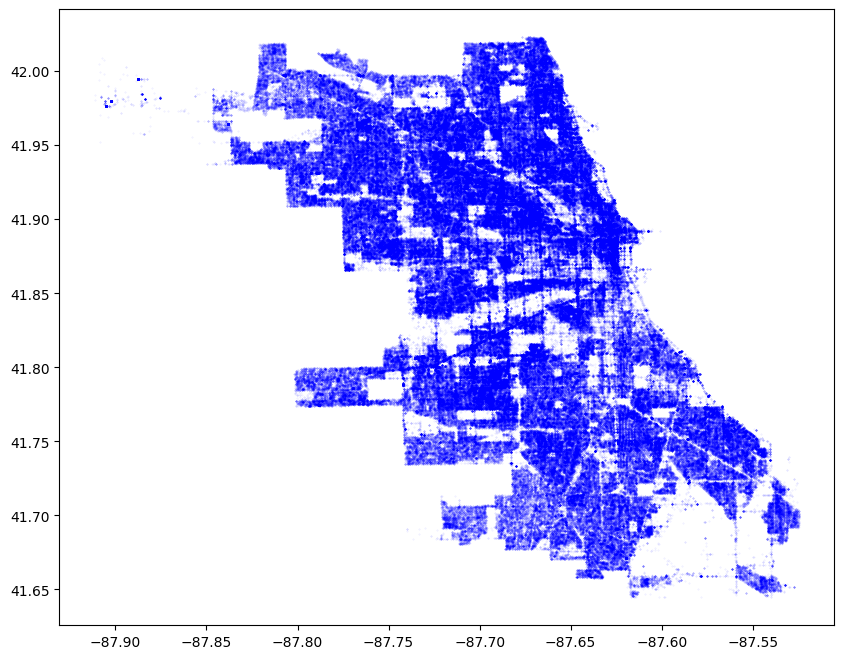

In [26]:
plt.figure(figsize=(10,8))
plt.scatter(df['LONGITUDE'], df['LATITUDE'], s=0.1, alpha=0.1, c='blue') #mit s grösse ändern der punkte


654890.0


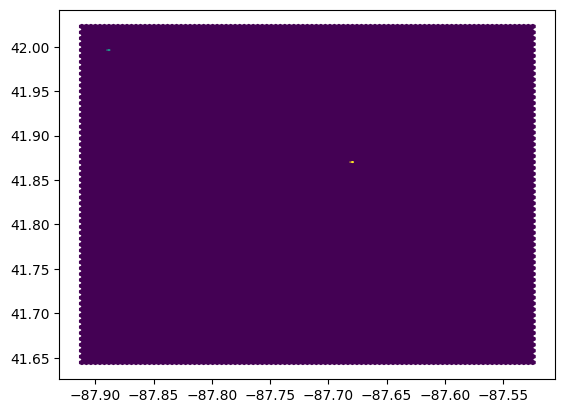

In [27]:
hb = plt.hexbin(df['LONGITUDE'], df['LATITUDE'], gridsize=100)
print(hb.get_array().max())


Hier sieht man einen Normalen, nicht logarithmischen Plot. Links mit schwarzem Hintergrund, Rechts mit Weissem hintergrund. 

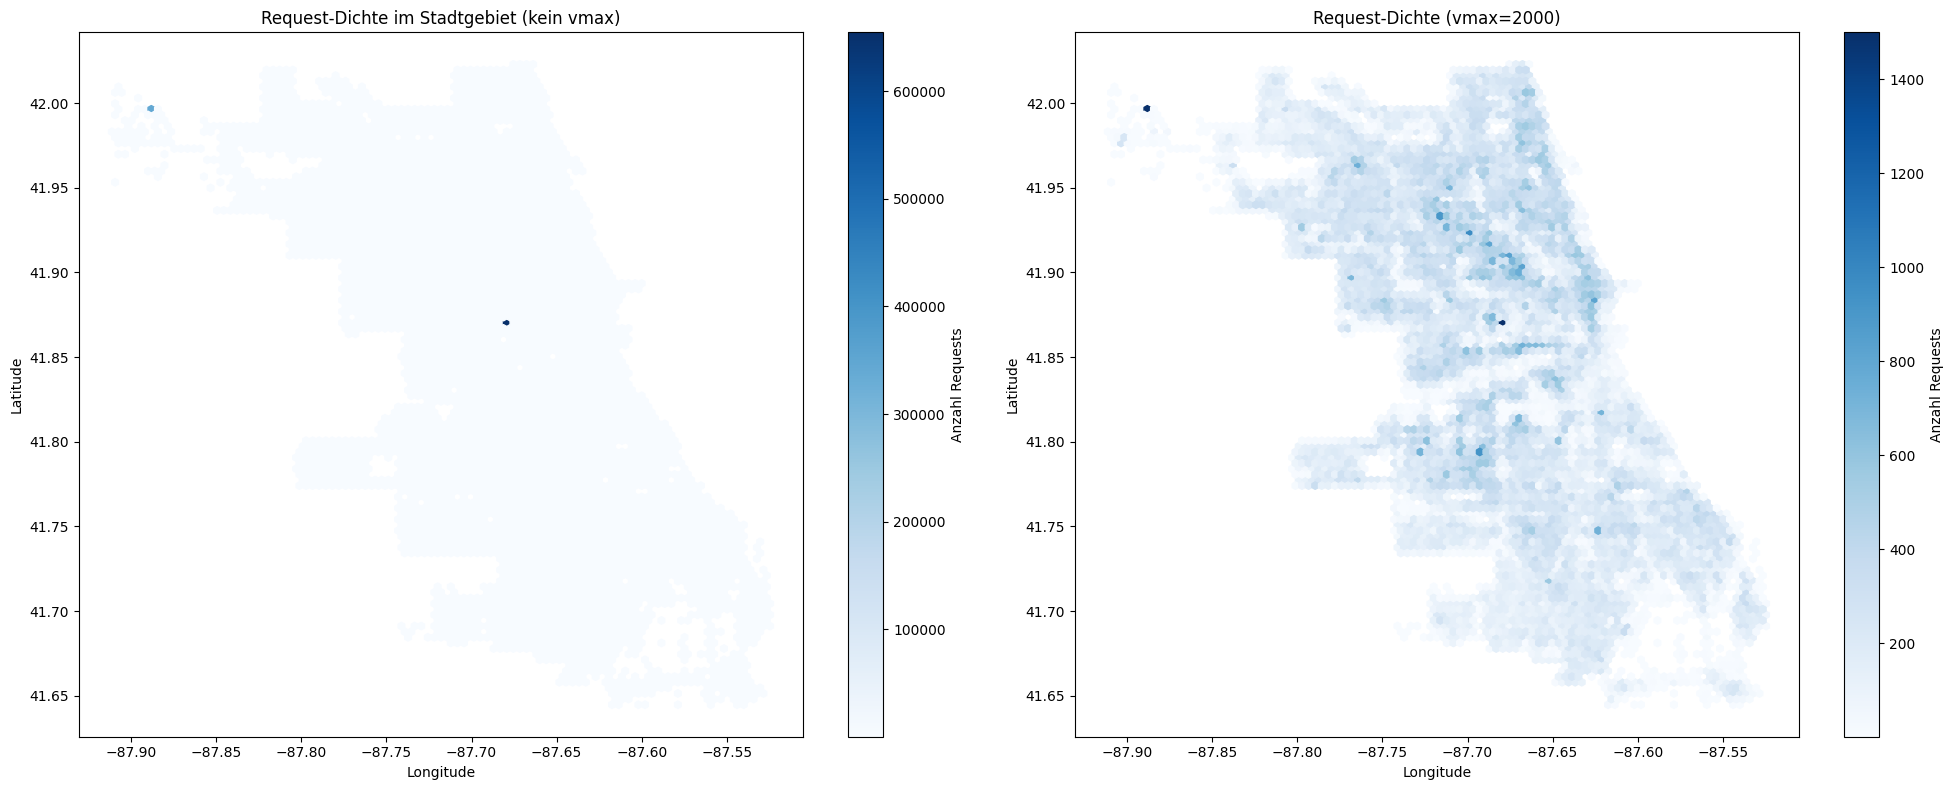

In [39]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(20,8))  # 1 Zeile, 2 Spalten

# Plot 1: Ohne vmax
hb1 = axes[0].hexbin(df['LONGITUDE'], df['LATITUDE'], gridsize=100, cmap='Blues', mincnt=1)
cb1 = fig.colorbar(hb1, ax=axes[0])
cb1.set_label('Anzahl Requests')
axes[0].set_xlabel('Longitude')
axes[0].set_ylabel('Latitude')
axes[0].set_title('Request-Dichte im Stadtgebiet (kein vmax)')

# Plot 2: Mit vmax auf 1500 gesetzt 
hb2 = axes[1].hexbin(df['LONGITUDE'], df['LATITUDE'], gridsize=100, cmap='Blues', mincnt=1, vmax=1500)
cb2 = fig.colorbar(hb2, ax=axes[1])
cb2.set_label('Anzahl Requests')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Latitude')
axes[1].set_title('Request-Dichte (vmax=2000)')

plt.tight_layout()
plt.show()

 Visualisierung der Request-Dichte
 Next step: karte über eine karte von chicago legen (vllt google maps satelit bild) und vergleichen: sind die Hotspots öffentliche Orte (Fussbalstation, Bahnhof oder so) die die Häufigkeit erklären oder werden solche Koordinaten als "standard" vom System gesetzt?

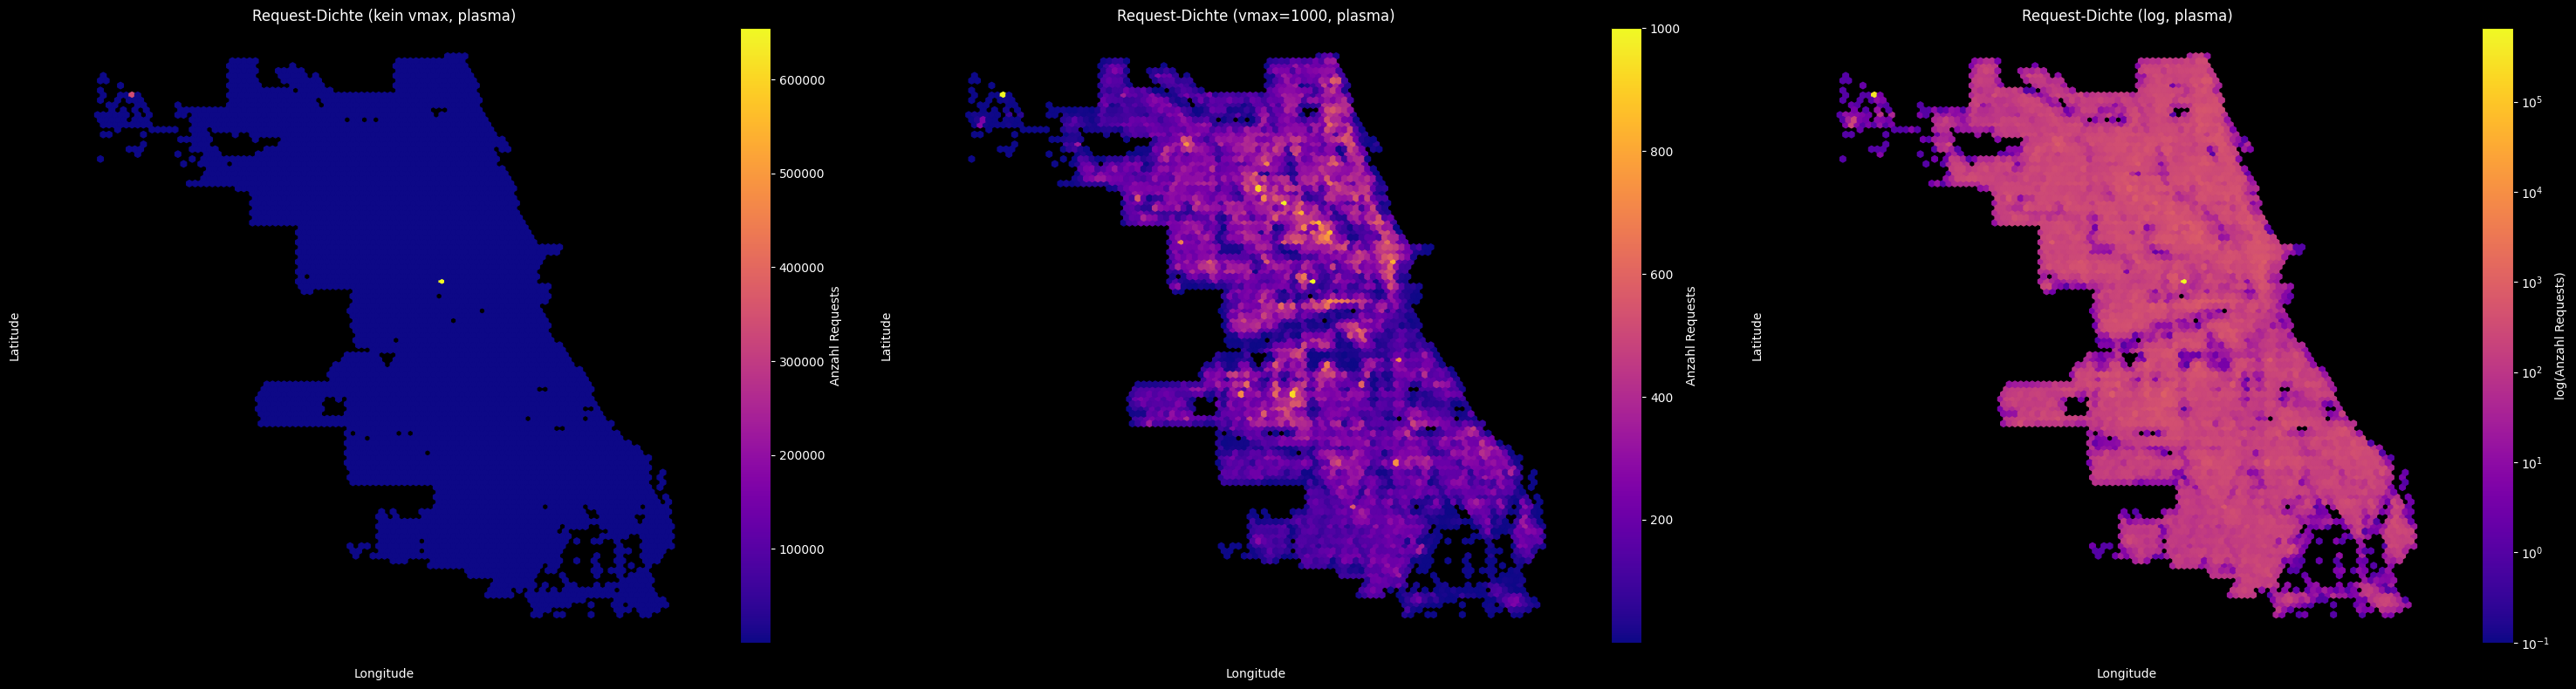

In [41]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(30,8), facecolor='black')

cmap = plt.cm.plasma.copy()
cmap.set_under('black')  # Hexagons unter vmin werden schwarz

# Plot 1: Linear, ohne vmax
axes[0].set_facecolor('black')
hb1 = axes[0].hexbin(df['LONGITUDE'], df['LATITUDE'],
                     gridsize=100, cmap=cmap, mincnt=1, vmin=0.1)
cb1 = fig.colorbar(hb1, ax=axes[0])
cb1.set_label('Anzahl Requests', color='white')
cb1.ax.yaxis.label.set_color('white')
cb1.ax.tick_params(colors='white')
axes[0].set_xlabel('Longitude', color='white')
axes[0].set_ylabel('Latitude', color='white')
axes[0].set_title('Request-Dichte (kein vmax, plasma)', color='white')

# Plot 2: Linear, mit vmax
axes[1].set_facecolor('black')
hb2 = axes[1].hexbin(df['LONGITUDE'], df['LATITUDE'],
                     gridsize=100, cmap=cmap, mincnt=1, vmin=0.1, vmax=1000)
cb2 = fig.colorbar(hb2, ax=axes[1])
cb2.set_label('Anzahl Requests', color='white')
cb2.ax.yaxis.label.set_color('white')
cb2.ax.tick_params(colors='white')
axes[1].set_xlabel('Longitude', color='white')
axes[1].set_ylabel('Latitude', color='white')
axes[1].set_title('Request-Dichte (vmax=1000, plasma)', color='white')

# Plot 3: Logarithmisch
axes[2].set_facecolor('black')
hb3 = axes[2].hexbin(df['LONGITUDE'], df['LATITUDE'],
                     gridsize=100, cmap=cmap, mincnt=1, vmin=0.1, bins='log')
cb3 = fig.colorbar(hb3, ax=axes[2])
cb3.set_label('log(Anzahl Requests)', color='white')
cb3.ax.yaxis.label.set_color('white')
cb3.ax.tick_params(colors='white')
axes[2].set_xlabel('Longitude', color='white')
axes[2].set_ylabel('Latitude', color='white')
axes[2].set_title('Request-Dichte (log, plasma)', color='white')

plt.tight_layout()
plt.show()

In [30]:
top_coords = (
    df.groupby(['LATITUDE', 'LONGITUDE'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
)

# Die ersten 10 Orte mit den meisten Beschwerden zeigen:
print(top_coords.head(10))


        LATITUDE  LONGITUDE   count
204207    41.872    -87.680  654657
383819    41.995    -87.888  343642
251910    41.906    -87.686     472
161090    41.818    -87.621     460
135268    41.795    -87.728     457
143498    41.801    -87.646     448
70134     41.749    -87.624     439
238349    41.896    -87.768     427
35859     41.717    -87.654     421
294904    41.932    -87.716     407


41.87183  -87.67985: "311 Operations" und "The Chicago Department of Public Health" (gesundheitsamt) in chicago: wurde wahrscheinlich als default value genutzt. \n
41.99490  -87.8877: "City of Chicago, Department of Aviation" (Stadtverwaltung) 

In [63]:
hotspot1 = df[(df['LATITUDE'].round(3) == 41.872) & (df['LONGITUDE'].round(3) == -87.680)]
hotspot2 = df[(df['LATITUDE'].round(3) == 41.995) & (df['LONGITUDE'].round(3) == -87.888)]
print("Hotspot 1 (41.872,-87.680): ")
print(hotspot1['SR_TYPE'].value_counts(dropna=False))

Hotspot 1 (41.872,-87.680): 
SR_TYPE
311 INFORMATION ONLY CALL                   654507
Cab Feedback                                   125
Pothole in Street Complaint                      6
Graffiti Removal Request                         5
Tree Removal Inspection                          3
Aircraft Noise Complaint                         2
Blue Recycling Cart                              2
Dead Animal Pick-Up Request                      2
Street Light Out Complaint                       2
Finance Parking Code Enforcement Review          2
Building Violation                               2
Inspect Public Way Request                       1
Divvy Bike Parking Complaint                     1
E-Scooter Parking Complaint                      1
Business Complaints                              1
Street Light Pole Door Missing Complaint         1
Ridesharing Complaint                            1
Water On Street Complaint                        1
Sign Repair Request - All Other Signs        

In [64]:
print("\nHotspot 2 (41.995, -87.888): ")
print( hotspot2['SR_TYPE'].value_counts(dropna=False))


Hotspot 2 (41.995, -87.888): 
SR_TYPE
Aircraft Noise Complaint     343623
Cab Feedback                     15
311 INFORMATION ONLY CALL         4
Name: count, dtype: int64


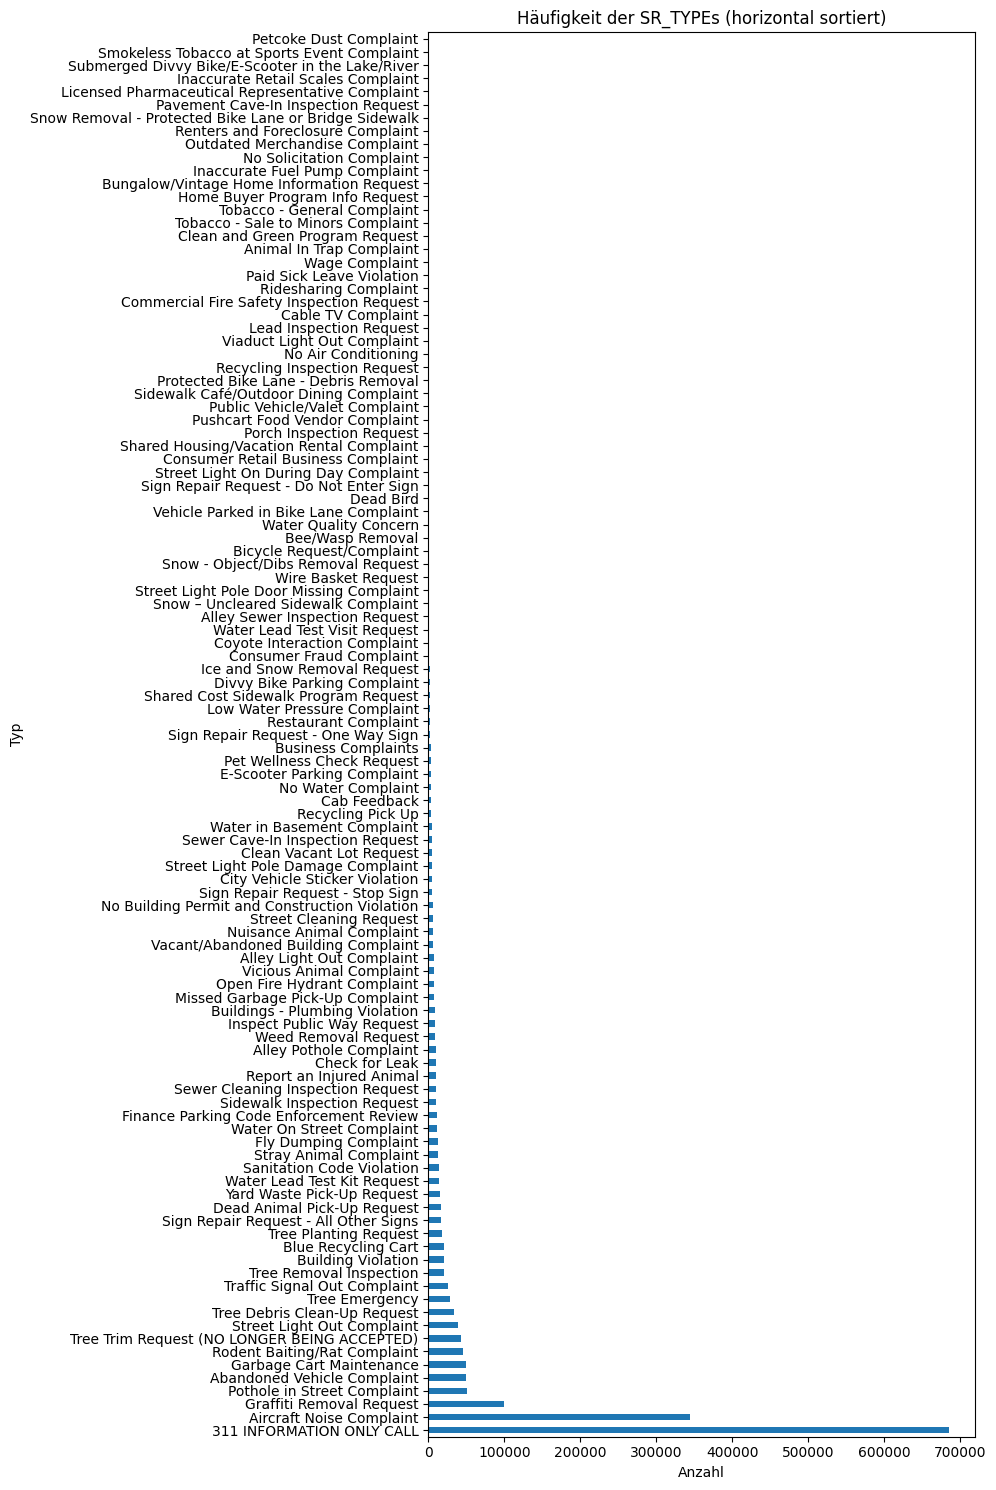

In [32]:

counts = df["SR_TYPE"].value_counts()
plt.figure(figsize=(10,15))  # Dynamische Höhe

counts.plot(kind='barh')
plt.xlabel("Anzahl")
plt.ylabel("Typ")
plt.title("Häufigkeit der SR_TYPEs (horizontal sortiert)")
plt.tight_layout()
plt.show()


In [33]:
y_elements = counts.index.tolist()
print(y_elements)

['311 INFORMATION ONLY CALL', 'Aircraft Noise Complaint', 'Graffiti Removal Request', 'Pothole in Street Complaint', 'Abandoned Vehicle Complaint', 'Garbage Cart Maintenance', 'Rodent Baiting/Rat Complaint', 'Tree Trim Request (NO LONGER BEING ACCEPTED)', 'Street Light Out Complaint', 'Tree Debris Clean-Up Request', 'Tree Emergency', 'Traffic Signal Out Complaint', 'Tree Removal Inspection', 'Building Violation', 'Blue Recycling Cart', 'Tree Planting Request', 'Sign Repair Request - All Other Signs', 'Dead Animal Pick-Up Request', 'Yard Waste Pick-Up Request', 'Water Lead Test Kit Request', 'Sanitation Code Violation', 'Stray Animal Complaint', 'Fly Dumping Complaint', 'Water On Street Complaint', 'Finance Parking Code Enforcement Review', 'Sidewalk Inspection Request', 'Sewer Cleaning Inspection Request', 'Report an Injured Animal', 'Check for Leak', 'Alley Pothole Complaint', 'Weed Removal Request', 'Inspect Public Way Request', 'Buildings - Plumbing Violation', 'Missed Garbage Pick-

Wo machen unsere lieben Ratten Probleme?

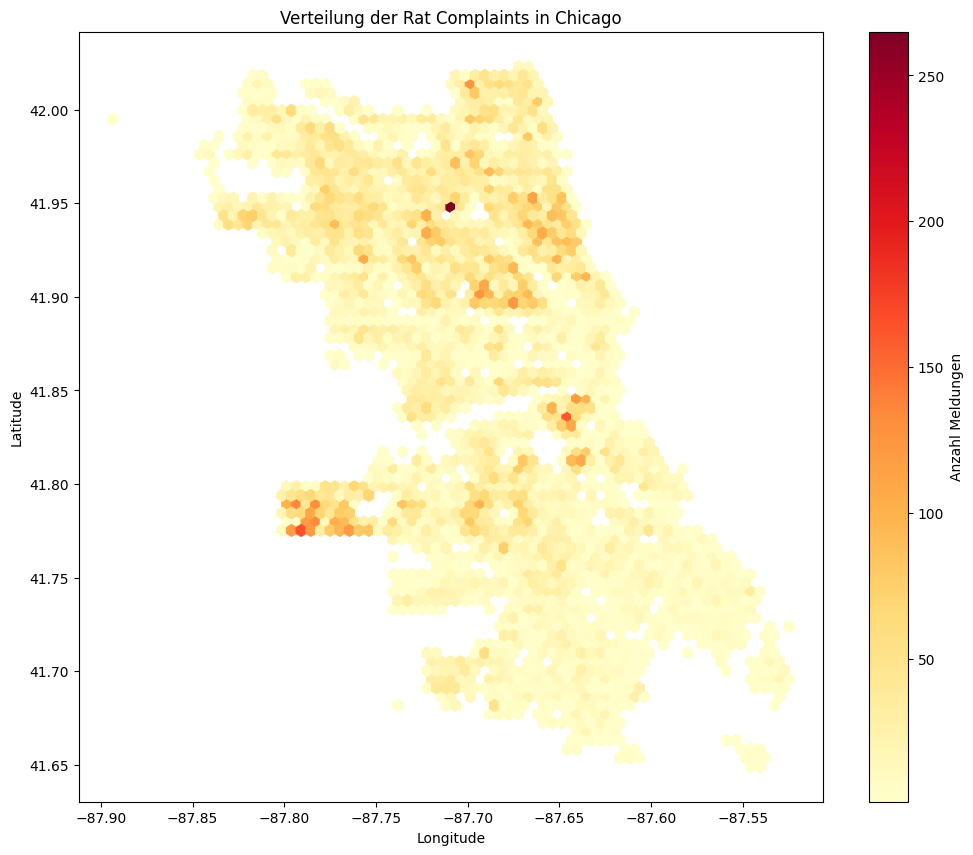

In [65]:
# Für typischen Key wie 'SR_TYPE' oder spezifischen Complaint-Text
rat_df = df[df["SR_TYPE"] == "Rodent Baiting/Rat Complaint"]

plt.figure(figsize=(12,10))
plt.hexbin(
    rat_df['LONGITUDE'],
    rat_df['LATITUDE'],
    gridsize=70,
    cmap='YlOrRd',
    mincnt=1
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Verteilung der Rat Complaints in Chicago')
plt.colorbar(label='Anzahl Meldungen')
plt.show()

In [66]:
#top 10
top_rat_coords = (
    rat_df.groupby(['LATITUDE', 'LONGITUDE'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
)

# Top 10 anzeigen:
print(top_rat_coords.head(10))


       LATITUDE  LONGITUDE  count
9681     41.817    -87.635     45
4612     41.774    -87.788     40
17336    41.920    -87.757     39
22383    41.948    -87.711     30
22376    41.948    -87.711     30
26260    41.977    -87.701     26
24042    41.959    -87.713     25
27958    41.995    -87.749     25
22402    41.948    -87.711     24
28142    41.997    -87.685     24
